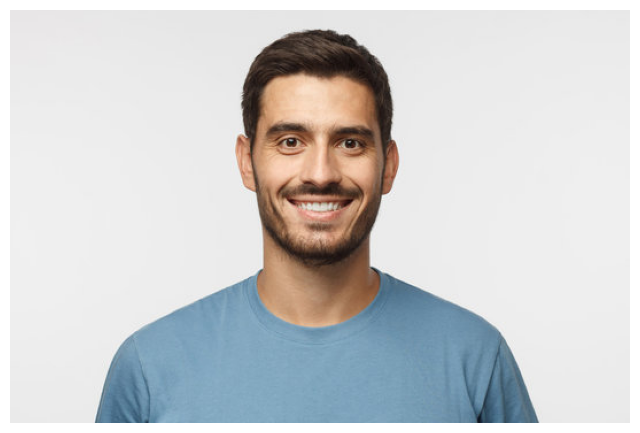

In [5]:
import cv2
import matplotlib.pyplot as plt
import mediapipe
import numpy as np 
import pandas as pd
img = cv2.imread(r"C:\Users\hp\Desktop\detection of the bels palsy\mediapipe\pic1.jpg")
 
fig = plt.figure(figsize = (8, 8))
plt.axis('off')
plt.imshow(img[:, :, ::-1])
plt.show()

In [6]:
mp_face_mesh = mediapipe.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True)

In [7]:
results = face_mesh.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
landmarks = results.multi_face_landmarks[0]

In [8]:
landmarks

landmark {
  x: 0.5017701983451843
  y: 0.45739373564720154
  z: -0.023462241515517235
}
landmark {
  x: 0.5032260417938232
  y: 0.4183630645275116
  z: -0.05379931628704071
}
landmark {
  x: 0.5022560358047485
  y: 0.4311000108718872
  z: -0.02852635644376278
}
landmark {
  x: 0.49602505564689636
  y: 0.3663840889930725
  z: -0.0425366647541523
}
landmark {
  x: 0.503613293170929
  y: 0.40245333313941956
  z: -0.057337820529937744
}
landmark {
  x: 0.5037829279899597
  y: 0.3814031183719635
  z: -0.05420353636145592
}
landmark {
  x: 0.5037924647331238
  y: 0.33220174908638
  z: -0.030549252405762672
}
landmark {
  x: 0.43748217821121216
  y: 0.32683396339416504
  z: 0.006575295235961676
}
landmark {
  x: 0.5038861632347107
  y: 0.30484330654144287
  z: -0.025378329679369926
}
landmark {
  x: 0.5043047070503235
  y: 0.28618568181991577
  z: -0.028070727363228798
}
landmark {
  x: 0.5055829882621765
  y: 0.2042413353919983
  z: -0.020803585648536682
}
landmark {
  x: 0.5017147660255432

In [49]:
face_oval = mp_face_mesh.FACEMESH_LEFT_EYE
 
df = pd.DataFrame(list(face_oval), columns = ["p1", "p2"])

In [53]:
data = {'p1': [71, 63, 105, 66, 107, 55, 193, 245, 128, 121, 120, 119, 117, 111, 143, 156, 70],
        'p2': [ 63, 105, 66, 107, 55, 193, 245, 128, 121, 120, 119, 117, 111, 143, 156, 70, 71]}

df = pd.DataFrame(data)
df

,p1,p2
0,71,63
1,63,105
2,105,66
3,66,107
4,107,55
5,55,193
6,193,245
7,245,128
8,128,121
9,121,120


In [54]:
routes_idx = []
 
p1 = df.iloc[0]["p1"]
p2 = df.iloc[0]["p2"]
 
for i in range(0, df.shape[0]):
     
    #print(p1, p2)
     
    obj = df[df["p1"] == p2]
    p1 = obj["p1"].values[0]
    p2 = obj["p2"].values[0]
     
    route_idx = []
    route_idx.append(p1)
    route_idx.append(p2)
    routes_idx.append(route_idx)
 
# -------------------------------
 
for route_idx in routes_idx:
    print(f"Draw a line between {route_idx[0]}th landmark point to {route_idx[1]}th landmark point")

Draw a line between 63th landmark point to 105th landmark point
Draw a line between 105th landmark point to 66th landmark point
Draw a line between 66th landmark point to 107th landmark point
Draw a line between 107th landmark point to 55th landmark point
Draw a line between 55th landmark point to 193th landmark point
Draw a line between 193th landmark point to 245th landmark point
Draw a line between 245th landmark point to 128th landmark point
Draw a line between 128th landmark point to 121th landmark point
Draw a line between 121th landmark point to 120th landmark point
Draw a line between 120th landmark point to 119th landmark point
Draw a line between 119th landmark point to 117th landmark point
Draw a line between 117th landmark point to 111th landmark point
Draw a line between 111th landmark point to 143th landmark point
Draw a line between 143th landmark point to 156th landmark point
Draw a line between 156th landmark point to 70th landmark point
Draw a line between 70th landma

In [55]:
routes = []
 
for source_idx, target_idx in routes_idx:
     
    source = landmarks.landmark[source_idx]
    target = landmarks.landmark[target_idx]
         
    relative_source = (int(img.shape[1] * source.x), int(img.shape[0] * source.y))
    relative_target = (int(img.shape[1] * target.x), int(img.shape[0] * target.y))
 
    #cv2.line(img, relative_source, relative_target, (255, 255, 255), thickness = 2)
     
    routes.append(relative_source)
    routes.append(relative_target)

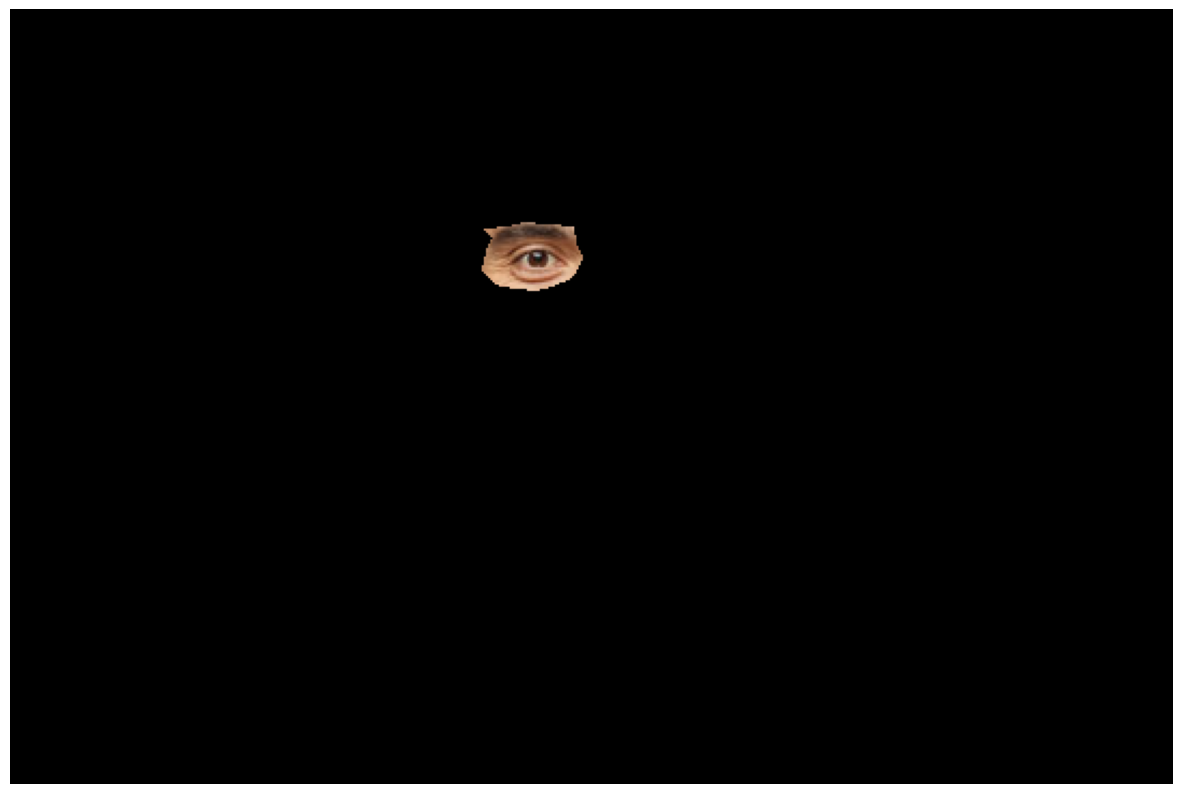

In [56]:
import numpy as np
 
mask = np.zeros((img.shape[0], img.shape[1]))
mask = cv2.fillConvexPoly(mask, np.array(routes), 1)
mask = mask.astype(bool)
  
out = np.zeros_like(img)
out[mask] = img[mask]
 
fig = plt.figure(figsize = (15, 15))
plt.axis('off')
plt.imshow(out[:, :, ::-1])